# A Monte Carlo Simulation to simulate a Random Walk

### The code below uses a Monte Carlo SImulation to simulate a price evolution known as "Random Walk". That is the potential evolution of asset prices over time, assuming that their daily returns follows a normal distribution.

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data
%matplotlib inline

### First we extract our asset data (in this case, the Google stock prices) to a Pandas Dataframe.

In [3]:
google = data.DataReader('GOOG', 'yahoo', start='1/1/2000')

In [7]:
google

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.693783,47.669952,49.676899,49.845802,44994500.0,49.845802
2004-08-20,54.187561,49.925285,50.178635,53.805050,23005800.0,53.805050
2004-08-23,56.373344,54.172661,55.017166,54.346527,18393200.0,54.346527
2004-08-24,55.439419,51.450363,55.260582,52.096165,15361800.0,52.096165
2004-08-25,53.651051,51.604362,52.140873,52.657513,9257400.0,52.657513
2004-08-26,53.626213,51.991844,52.135906,53.606342,7148200.0,53.606342
2004-08-27,53.959049,52.503513,53.700729,52.732029,6258300.0,52.732029
2004-08-30,52.404160,50.675404,52.299839,50.675404,5235700.0,50.675404
2004-08-31,51.519913,50.749920,50.819469,50.854240,4954800.0,50.854240


### Calculate the compound annual growth rate (CAGR). That gives us the mean return input (MU)

In [16]:
days = (google.index[-1] - google.index[0]).days
cagr = (((google['Adj Close'][-1] / google['Adj Close'][1])) ** (365.0/days)) - 1
print('CAGR = ',str(round(cagr,4)*100)+"%")
mu = cagr

CAGR =  24.349999999999998%


### Create a series of percentage returns and calculate the annual volatility of returns

In [15]:
google['Returns'] = google['Adj Close'].pct_change()
vol = google['Returns'].std()*math.sqrt(252)
print("Annual Volatility = ", str(round(vol,4)*100)+"%")

Annual Volatility =  30.28%


### Now, we do the Monte Carlo stuff

In [18]:
S = google['Adj Close'][-1]
T = 252
mu = 0.24
vol = 0.42

### Create a list of daily returns using random normal distribution

In [19]:
daily_returns = np.random.normal((mu/T), vol/math.sqrt(T), T)+1

In [20]:
price_list = [S]

for x in daily_returns:
    price_list.append(price_list[-1]*x)

<function matplotlib.pyplot.show>

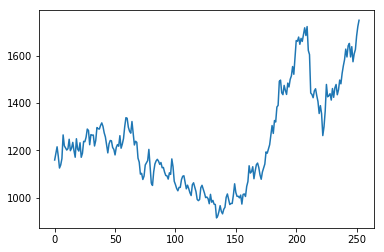

In [22]:
plt.plot(price_list)
plt.show

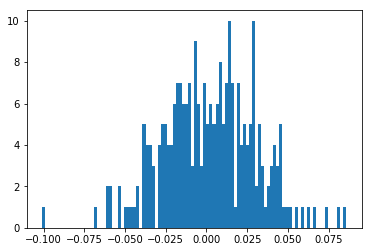

In [25]:
plt.hist(daily_returns-1,100)
plt.show()

### This code generates only a single simulation of price evolution during a year

### Now, lets make some more simulations so we can have more insight into the risk.

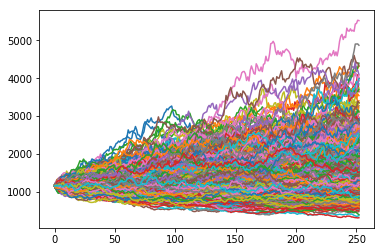

In [28]:
for i in range(1000):
    daily_returns = np.random.normal((mu/T), vol/math.sqrt(T), T)+1
    price_list = [S]
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    plt.plot(price_list)
plt.show()

### This is the outcome of 1000 simulations (!)

### Now, let's try to make sense of all these simulations with a histogram. That will show us the distribution of the ending simulations values, rather then the returns for an only simulation

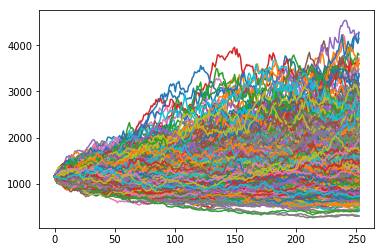

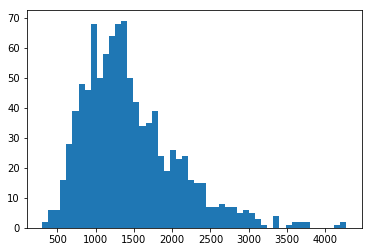

In [31]:
result = []
for i in range(1000):
    daily_returns = np.random.normal((mu/T), vol/math.sqrt(T), T)+1
    price_list = [S]
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
    result.append(price_list[-1])
    plt.plot(price_list)
plt.show()
plt.hist(result,bins=50)
plt.show()

### Now, if we calculate the mean of this distribution, we will be able to extract our expected value for the stock

In [32]:
print(round(np.mean(result),2))

1456.8


### And that's all for this one

### The main source for this exercise came from [this tutorial](http://www.pythonforfinance.net/2016/11/28/monte-carlo-simulation-in-python/). Definetly worth checking for more information!